# Classification: Convolutional Neural Networks

To classify images from the CIFAR10 dataset into 10 categories using a neural network and a convolutional neural network. 
<br>
Data source: https://www.cs.toronto.edu/~kriz/cifar.html
<br>
Useful links for visualization and in-depth explanation: 
- https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
- https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras
- https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
- https://github.com/keras-team/keras/blob/4f2e65c385d60fa87bb143c6c506cbe428895f44/examples/cifar10_cnn.py

Concepts:
- Neural network vs convolutional neural network.
- Tensor / Neuron / Kernel / Activation maps / Padding / Stride.
- Non-linearity (ReLU, Sigmoid, Softmax).
- Pooling (Max pool, mean pool) / Flatten / Dropout.
- Classification/ Fully-connected layer.

# Install and Import Modules

In [1]:
!pip install --upgrade tensorflow
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset and Preproces Data

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
# all CIFAR-10 class names

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 0, 'frog')

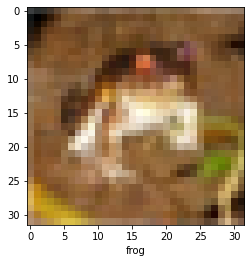

In [7]:
plt.imshow(X_train[0])
plt.xlabel(classes[int(y_train[0][0])])

In [8]:
# ont-hot encoding

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
# normalize input data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Train and Evaluate A Convolutional Neural Network Model

In [11]:
input_shape = (32, 32, 3)
num_classes = 10

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [14]:
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 438s 277ms/step - loss: 1.8459 - accuracy: 0.3238 - val_loss: 1.6229 - val_accuracy: 0.4215
Epoch 2/10
1563/1563 [==============================] - 407s 260ms/step - loss: 1.4932 - accuracy: 0.4592 - val_loss: 1.4000 - val_accuracy: 0.4901
Epoch 3/10
1563/1563 [==============================] - 380s 243ms/step - loss: 1.3588 - accuracy: 0.5133 - val_loss: 1.2638 - val_accuracy: 0.5468
Epoch 4/10
1563/1563 [==============================] - 263s 169ms/step - loss: 1.2609 - accuracy: 0.5522 - val_loss: 1.1383 - val_accuracy: 0.6008
Epoch 5/10
1563/1563 [==============================] - 310s 198ms/step - loss: 1.1797 - accuracy: 0.5823 - val_loss: 1.0990 - val_accuracy: 0.6098
Epoch 6/10
1563/1563 [==============================] - 292s 187ms/step - loss: 1.1133 - accuracy: 0.6048 - val_loss: 1.0878 - val_accuracy: 0.6140
Epoch 7/10
1563/1563 [==============================] - 349s 223ms/step - loss: 1.0572 - accuracy: 0.6278 - val_

In [16]:
# save model

model.save('./cnn_model.h5')

In [17]:
# evaluate: output loss and accuracy scores

scores = model.evaluate(X_test, y_test)
print(f"Test loss: {scores[0]}\nTest accuracy: {scores[1]}")

313/313 [==============================] - 9s 28ms/step - loss: 0.8968 - accuracy: 0.6906
Test loss: 0.8968452215194702
Test accuracy: 0.6905999779701233


Predicted X_test[1]: ship


Text(0.5, 0, 'ship')

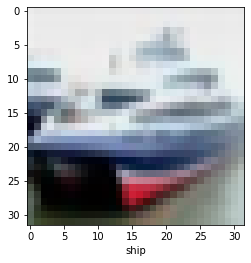

In [18]:
# predict: output predicted class indices, not scores

y_pred = model.predict(X_test)

predicted_index = np.argmax(y_pred[1])
predicted_class = classes[predicted_index]
print(f"Predicted X_test[1]: {predicted_class}")

plt.imshow(X_test[1])
plt.xlabel(classes[np.argmax(y_test[1])])

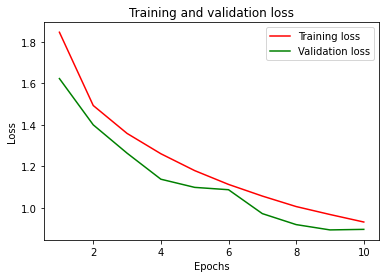

In [19]:
# plot losses

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

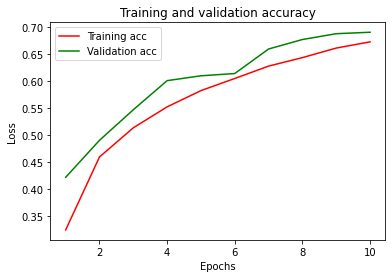

In [20]:
# plot accuracies

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()